<a href="https://colab.research.google.com/github/carlafalcone93/ProyectoParteIIIFALCONE/blob/main/ProyectoParteIIIFALCONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objetivo

El objetivo del proyecto, es aplicar el mejor modelo para poder predecir el precio de venta de los vehículos, considerando distintas características.

#Importación de liberías
Importamos todas las librerías necesarias para realizar el análisis, modelado y visualiziación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
pip install --upgrade scikit-learn xgboost

In [3]:
import sklearn
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)

scikit-learn version: 1.6.1
XGBoost version: 2.1.3


#Carga del Dataset

Realizamos la carga del dataset desde una URL en GitHub.

In [4]:
url = 'https://raw.githubusercontent.com/carlafalcone93/ProyectoParteIIIFALCONE/refs/heads/main/car_price_dataset.csv'
df = pd.read_csv(url)

El dataset seleccionado, contiene columnas no numéricas, por lo que para realizar la matriz de correlación, es necesario convertirlas en numéricas.

In [5]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for col in ['Brand', 'Model', 'Fuel_Type', 'Transmission']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#Análisis exploratorio de datos

Visualizamos la distribución de la variable objetivo, que en este caso será el precio, para poder entender su comportamiento.
Además creamos una matriz de correlación para identificar relaciones entre las variables.

Primeras filas del dataset:
   Brand  Model  Year  Engine_Size  Fuel_Type  Transmission  Mileage  Doors  \
0      6     24  2020          4.2          0             1   289944      3   
1      2     19  2012          2.0          2             0     5356      2   
2      7     16  2020          4.2          0             0   231440      4   
3      0     22  2023          2.0          1             1   160971      2   
4      9     17  2003          2.6          2             2   286618      3   

   Owner_Count  Price  
0            5   8501  
1            3  12092  
2            2  11171  
3            1  11780  
4            3   2867  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  int64  
 1   Model         10000 non-null  int64  
 2   Year          10000 non-null  int64  
 3  

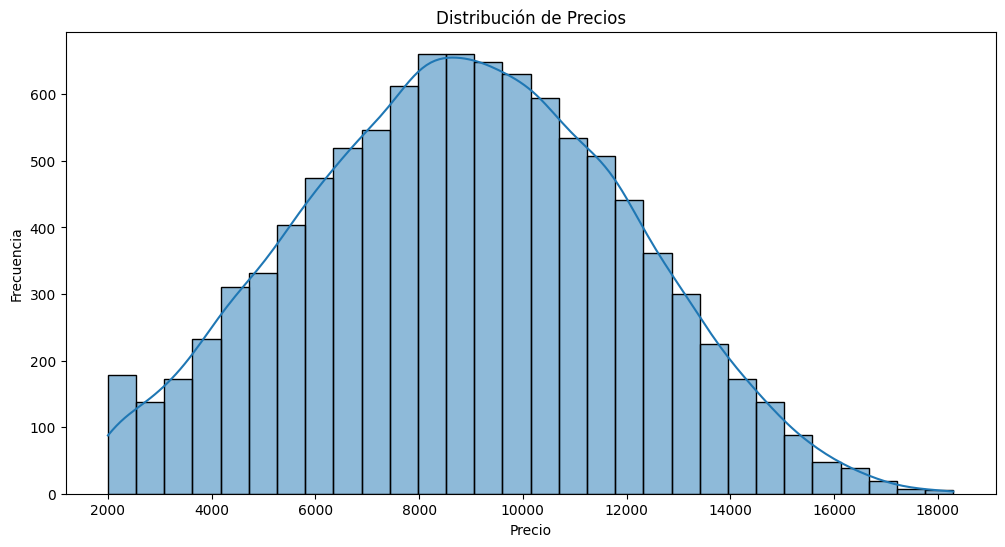

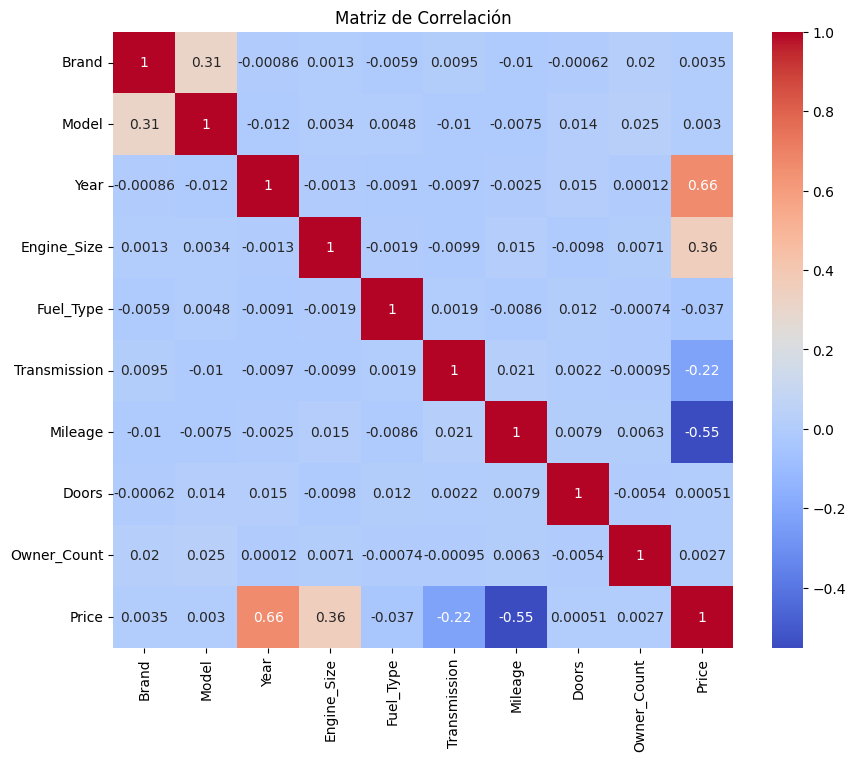

In [6]:
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

En la matriz de correlación, podemos observar que las variables "Año" y "Kilometraje" son las que mas relación tienen con la variable objetivo "Precio".

Además se hizo el análisis univariado de la variable objetivo, para entender su comportamiento. En el histograma podemos observar, que la mayoría de los vehículos tienen un precio entre 7000 y 11000 USD.

#Procesamiento de datos

Eliminamos filas con valores nulos y realizamos escalado de datos.

In [7]:
print("\nValores nulos por columna:")
print(df.isnull().sum())
df = df.dropna()  # Eliminar filas con valores nulos (o imputar según sea necesario)

scaler = StandardScaler()
X = df.drop('Price', axis=1)
y = df['Price']
X_scaled = scaler.fit_transform(X)


Valores nulos por columna:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


#Selección de características

Utilizamos SelectKBest para seleccionar las 5 características más importantes basadas en un test estadístico.

In [8]:
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas:", selected_features)


Características seleccionadas: Index(['Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage'], dtype='object')


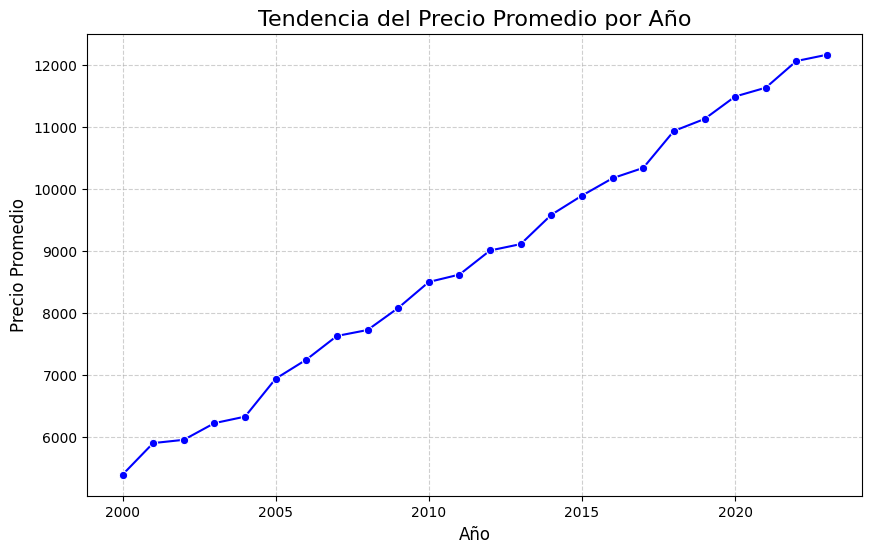

In [23]:
# Agrupar por año y calcular el precio promedio
df_grouped = df.groupby('Year')['Price'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price', data=df_grouped, marker='o', color='blue')

# Personalizar el gráfico
plt.title('Tendencia del Precio Promedio por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()



Además se realizó un análisis bivariado, donde podemos observar la relación entre la variable objetivo "Precio" y la varible que tiene mayor correlación "Año".

#División del Dataset

Dividimos el dataset en conjuntos de entrenamiento (80%) y prueba (20%).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

#Selección de algoritmo

En este caso, utilizaremos un algoritmo de regresión.
Utilizamos Random Forest Regressor.

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Predecir y calcular métricas
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor - MSE:", mse_rf, "R²:", r2_rf)


Random Forest Regressor - MSE: 141752.202143 R²: 0.9845717125603999


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predecir y calcular métricas
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal - MSE:", mse_lr, "R²:", r2_lr)

Regresión Lineal - MSE: 818443.162199529 R²: 0.9109207746441129


In [25]:
from sklearn.svm import SVR

# Entrenar el modelo
model_svm = SVR(kernel='linear')
model_svm.fit(X_train, y_train)

# Predecir y calcular métricas
y_pred_svm = model_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Regresión - MSE:", mse_svm, "R²:", r2_svm)

SVM Regresión - MSE: 1010337.4343983397 R²: 0.8900350321671852


Se implementaron los algoritmos: Regresion lineal, Random forest y Support Vector Machines. Se realizaron comparaciones entre los 3 algoritmos, observando que el presenta mayor R² es "Random forest".

#Conclusiones:

El modelo Random Forest obtuvo un MSE de 142351.5965564544 y un R² de 0.9845064745664877.

El modelo Regresion lineal obtuvo un MSE de 818443.162199529 y un R² de 0.9109207746441129.

El modelo SVM obtuvo un MSE de 1010337.4343983397 y un R² de 0.8900350321671852.

El modelo que presenta mayor R² y menor error, es el de Random Forest. Al tener un R²=0.98 podemos decir que el modelo es bueno para predecir la varible objetivo "Precio". Además es el que presenta menor MSE, por lo que es el más preciso y sus predicciones estan mas cercanas a los valores reales.

Las características más importantes son: 'Año', 'Tamaño del motor', 'Tipo de combustible', 'Transmisión', 'Kilometraje'.

Para mejorar el modelo, se podrían incluir más datos o probar otros algoritmos.